In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from gc import callbacks

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Cancer_data/Full_cancer_data"

In [4]:
x_benign="/content/drive/MyDrive/Full_cancer_data/benign"
x_malignant="/content/drive/MyDrive/Full_cancer_data/malignant"

In [5]:
import cv2 #open cv
import glob

x_benign_images = [cv2.imread(file) for file in glob.glob(x_benign+'/*.jpg')] #data will be read as a list using imread
x_malignant_images= [cv2.imread(file) for file in glob.glob(x_malignant+'/*.jpg')]

In [6]:
print("Number of begnign images =" + str(len(x_benign_images)))
print("Number of malignant images =" + str(len(x_malignant_images)))

Number of begnign images =1800
Number of malignant images =1497


In [7]:
x_benign_images=np.array(x_benign_images) #convert to array of images 
x_malignant_images=np.array(x_malignant_images)

In [8]:
print(x_benign_images.shape)
print(x_malignant_images.shape)

(1800, 224, 224, 3)
(1497, 224, 224, 3)


In [9]:
# Create labels
y_benign = np.zeros(x_benign_images.shape[0]) #target value labels
y_malignant = np.ones(x_malignant_images.shape[0])

In [10]:
y_benign

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
# Merge data 
X = np.concatenate((x_benign_images, x_malignant_images), axis = 0)
y = np.concatenate((y_benign, y_malignant), axis = 0) 

In [12]:
type(y)

numpy.ndarray

In [13]:
X.shape

(3297, 224, 224, 3)

In [14]:
y.shape

(3297,)

In [15]:
y=y.astype(np.int64) #change dtype from float to int
y

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
# one hot encoding

# y = to_categorical(y, num_classes= 2)
# y.dtype

In [17]:
# Shuffle data
s = np.arange(X.shape[0]) #(start, stop, spacing=1(default))
np.random.shuffle(s) #shuffles
X = X[s]
y= y[s] #here x and y both has same s (index)
print(s)
print(y[s])

[2313 1196 2414 ... 1164 2904 1361]
[1 1 0 ... 1 0 0]


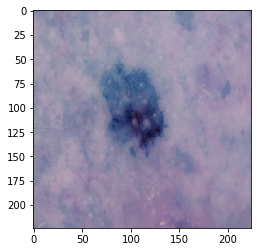

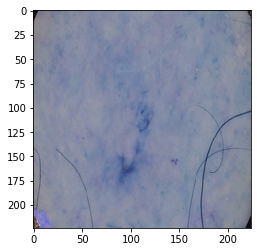

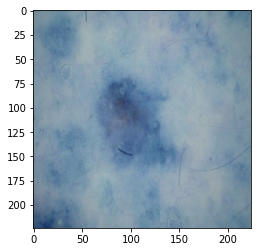

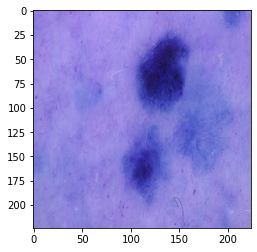

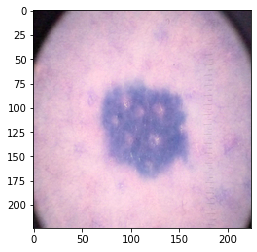

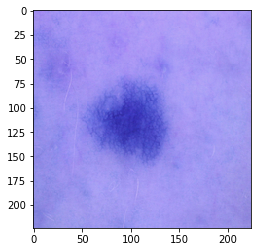

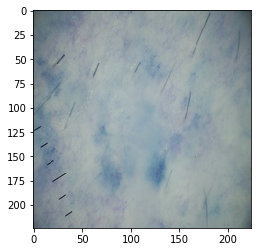

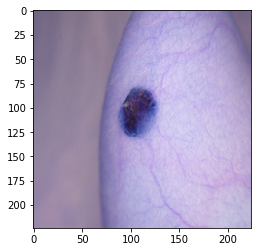

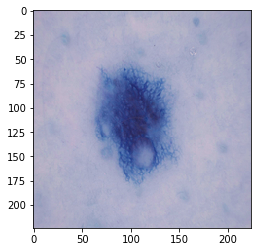

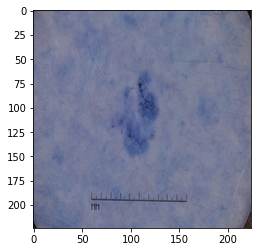

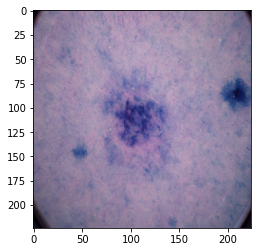

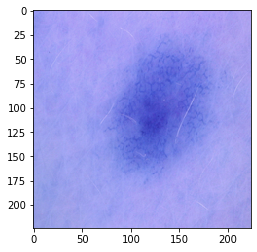

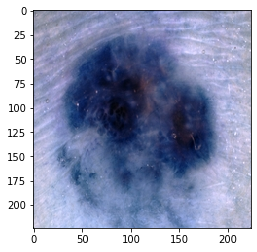

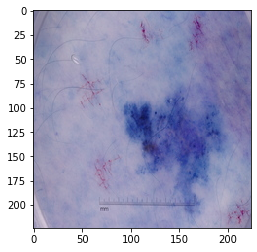

In [18]:
for i in range(1, 15):
  plt.imshow(X[i], interpolation='nearest')
  plt.show()

In [19]:
X.shape

(3297, 224, 224, 3)

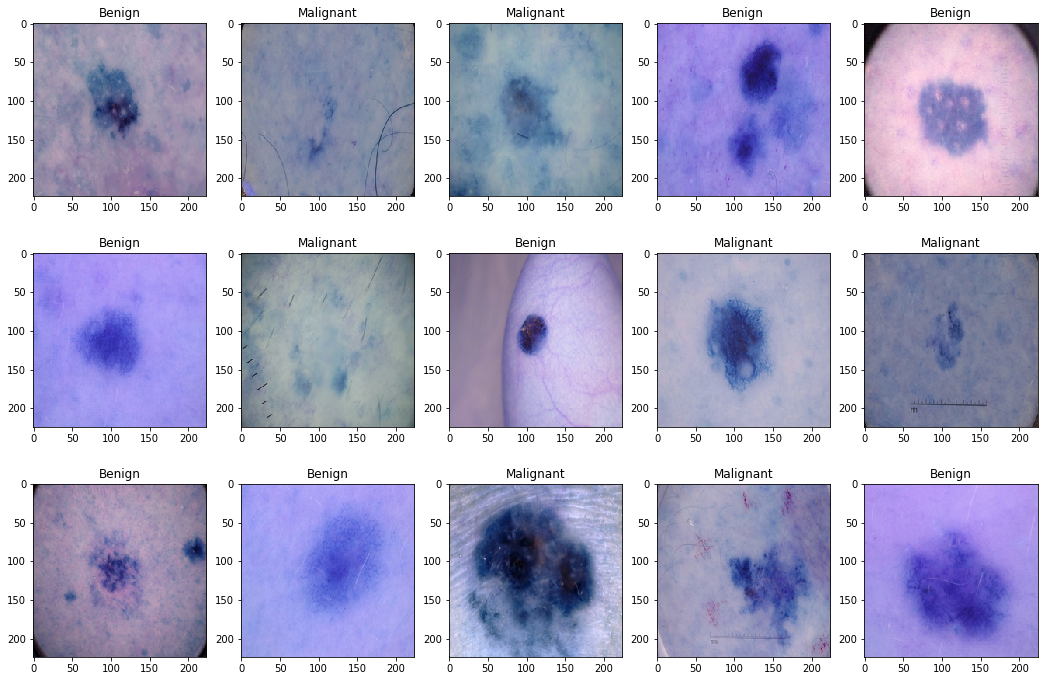

In [20]:
fig=plt.figure(figsize=(18, 12))
columns = 5
rows = 3

for i in range(1, columns*rows +1): #1 to 16 range
    ax = fig.add_subplot(rows, columns, i)
    if y[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X[i], interpolation='nearest')
plt.show()

In [21]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)


In [22]:
print("x_train_shape" +str(X_train.shape))
print("x_test_shape" +str(X_test.shape))
print("y_train_shape" +str(Y_train.shape))
print("y_test_shape" +str(Y_test.shape))

x_train_shape(2637, 224, 224, 3)
x_test_shape(660, 224, 224, 3)
y_train_shape(2637,)
y_test_shape(660,)


In [23]:
y_unique=np.unique(Y_train, return_counts=True)
y_unique


(array([0, 1]), array([1436, 1201]))

In [24]:
y_unique[1][0]

1436

In [25]:
y_unique=np.unique(Y_test, return_counts=True)
y_unique

(array([0, 1]), array([364, 296]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


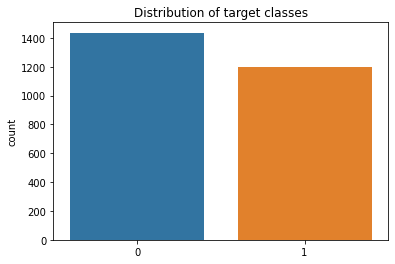

In [26]:
plt.title("Distribution of target classes")
sns.countplot(Y_train)

**Data augmentation**

In [27]:
# #data augmentation
# y_1=np.where(Y_train==1)#malignant images
# y_1






In [28]:
# train_ds=np.take(X_train, list(y_1), axis=0) #it applies filter indices, takes only images from those index value=1

In [29]:
# train_ds

In [30]:
# train_ds.shape

In [31]:
# data_augmentation = tf.keras.Sequential(
#   [
#     layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224, 224,3)),
#     layers.experimental.preprocessing.RandomRotation(0.1),
#     layers.experimental.preprocessing.RandomZoom(0.1),
#   ]
# )

In [32]:
# diff=abs(y_unique[1][0]-y_unique[1][1]) # the diff between counts of class 0 and class 1 in Y_train



# lst=[]
# for images in train_ds:
#         augmented_images = data_augmentation(images) #input train_ds images in data augmentation
#         lst.append(augmented_images)


# lst=np.array(lst, dtype="uint8") #turning images into array like a vector form

In [33]:
# lst.shape #new malignant images created as to the value equal in y_train count for malignant images

In [34]:
# augmented_images_final=np.array(lst[0][0:diff]) #go inside the first dimension and take out the diff (count) number of images, we are not doing random choice.


In [35]:
# augmented_images_final.shape #final shape 

In [36]:
# #generating augmented malignant images

# for i in range(diff): 
#   plt.imshow(augmented_images_final[i], interpolation='nearest')
#   plt.title("Malignant")
#   plt.show()

In [37]:
# X_train

In [38]:
# X_train = np.concatenate((X_train, augmented_images_final), axis = 0) #concatenate the actual train data with the new augmented data


In [39]:
# y_augmented = np.ones(augmented_images_final.shape[0])

In [40]:
# Y_train = np.concatenate((Y_train, y_augmented), axis = 0)

In [41]:
# X_train.shape

In [42]:
# Y_train.shape

In [43]:
#shuffle for randomness before modeling
# s = np.arange(X_train.shape[0]) #(start, stop, spacing=1(default))
# np.random.shuffle(s) #shuffles
# X_train = X_train[s]
# Y_train= Y_train[s] #here x and y both has same s (index)
# print(s)
# print(Y_train[s])

In [44]:
y_unique=np.unique(Y_train, return_counts=True) #the class here balanced
y_unique

(array([0, 1]), array([1436, 1201]))

In [45]:
Y_train=Y_train.astype(np.int64) #
Y_train

array([1, 0, 1, ..., 0, 1, 1])

**Tensorspec concept of combining image and its label into a tuple**

In [46]:
dataset = tf.data.Dataset.range(2) # (x_train, y_train)
def g(x):
  return tf.constant(X_train), tf.constant(Y_train) #change to image and labels tuple with constants, unchangeable values
result_train = dataset.map(g) #dataset creates empty tuple in which we explicitly assign image and the lable
result_train.element_spec #spec of every element in the component

(TensorSpec(shape=(2637, 224, 224, 3), dtype=tf.uint8, name=None),
 TensorSpec(shape=(2637,), dtype=tf.int64, name=None))

In [47]:
dataset = tf.data.Dataset.range(2) # (x_test, y_test)
def g(x):
  return tf.constant(X_test), tf.constant(Y_test) #change to image and labels tuple with constants, unchangeable values
result_test = dataset.map(g) #dataset creates empty tuple in which we explicitly assign image and the lable
result_test.element_spec #spec of every elent in the component

(TensorSpec(shape=(660, 224, 224, 3), dtype=tf.uint8, name=None),
 TensorSpec(shape=(660,), dtype=tf.int64, name=None))

In [48]:
ds_train=result_train
ds_test=result_test


In [49]:
print(ds_train) #ds_train is map dataset and it will not have shape 

<MapDataset element_spec=(TensorSpec(shape=(2637, 224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(2637,), dtype=tf.int64, name=None))>


In [50]:
print(ds_test)

<MapDataset element_spec=(TensorSpec(shape=(660, 224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(660,), dtype=tf.int64, name=None))>


In [51]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

#for train data
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE) #autotune with the runtime
ds_train = ds_train.cache() #cache transformation can cache a dataset, either in memory or on local storage. This will save some operations (like file opening and data reading) from being executed during each epoch.
ds_train = ds_train.shuffle(X_train.shape[0]) #reshuffle on train , For true randomness, set the shuffle buffer to the full dataset size.
ds_train = ds_train.batch(128) #Batch elements of the dataset after shuffling to get unique batches at each epoch
ds_train = ds_train.prefetch(tf.data.AUTOTUNE) #This allows later elements to be prepared while the current element is being processed.

#same for test data
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [52]:
print(ds_train)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 2637, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2637), dtype=tf.int64, name=None))>


In [53]:
print(ds_test)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 660, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 660), dtype=tf.int64, name=None))>


In [54]:
X_train.shape

(2637, 224, 224, 3)

**Modeling**

**Baseline Model**

In [55]:
# # Normalizing the image data

X_train=X_train/255.0

In [56]:
model = Sequential()

#add model layers
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))

model.add(Flatten()) #we have two layers after the flatening
model.add(Dense(128, activation="relu"))
model.add(Dense(2, activation="softmax"))


In [57]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.00001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

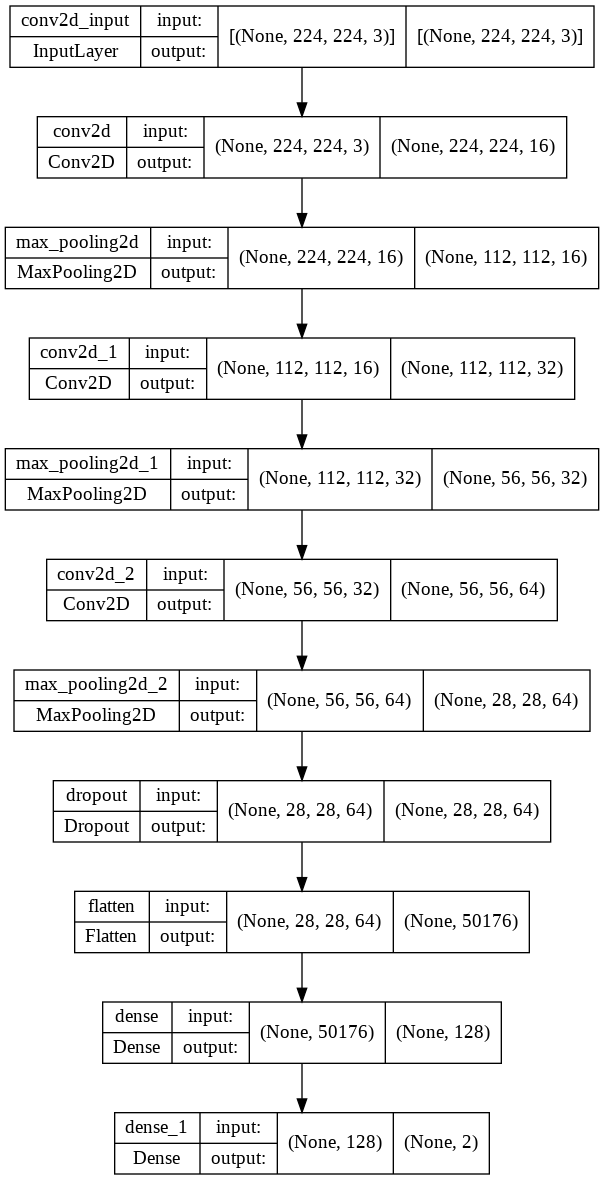

In [58]:
from tensorflow.keras.utils import to_categorical, plot_model
plot_model(model, to_file='cnn-mnist.png', show_shapes=True) #shows the summary of the model

In [59]:
from keras.callbacks import EarlyStopping #early stopping
es=EarlyStopping(
    monitor='val_sparse_categorical_accuracy',
    min_delta=0,
    patience=100,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [60]:
history=model.fit(
    X_train,Y_train,
    epochs=1000, #can change the epoch
    validation_split=0.15, verbose=1,callbacks=[es])

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


71/71 [==============================] - 13s 41ms/step - loss: 0.6359 - sparse_categorical_accuracy: 0.6305 - val_loss: 0.5870 - val_sparse_categorical_accuracy: 0.7121
Epoch 2/1000
71/71 [==============================] - 2s 33ms/step - loss: 0.5578 - sparse_categorical_accuracy: 0.7100 - val_loss: 0.5465 - val_sparse_categorical_accuracy: 0.7247
Epoch 3/1000
71/71 [==============================] - 2s 33ms/step - loss: 0.5112 - sparse_categorical_accuracy: 0.7314 - val_loss: 0.5089 - val_sparse_categorical_accuracy: 0.7500
Epoch 4/1000
71/71 [==============================] - 2s 33ms/step - loss: 0.4765 - sparse_categorical_accuracy: 0.7648 - val_loss: 0.4935 - val_sparse_categorical_accuracy: 0.7247
Epoch 5/1000
71/71 [==============================] - 2s 33ms/step - loss: 0.4524 - sparse_categorical_accuracy: 0.7724 - val_loss: 0.4803 - val_sparse_categorical_accuracy: 0.7601
Epoch 6/1000
71/71 [==============================] - 2s 32ms/step - loss: 0.4340 - sparse_categorical_accu

In [61]:
model.save('/content/drive/MyDrive/my_model.h5')

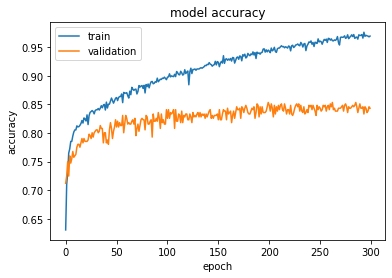

In [62]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

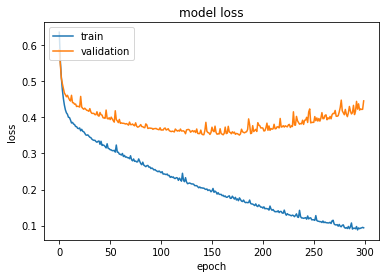

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [64]:
# np.unique(Y_train)

In [65]:
# Testing model on test data to evaluate
y_pred = model.predict(X_test)
y_pred #it defaulty arranges class 0 prob at index 0 and for class 1 at index 1

array([[1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [9.7035436e-06, 9.9999034e-01]], dtype=float32)

In [66]:
lst=[]

for i in range(0,len(y_pred)):
     k=np.argmax(y_pred[i]) #it gives index value of the highest probability for each iteration 
     print(k)
     lst.append(k)

y_pred_label=np.array(lst)

0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
1
1
0
0
1
0
1
0
0
1
0
1
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
1
0
1
0
1
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0


In [67]:
# type(Y_test)

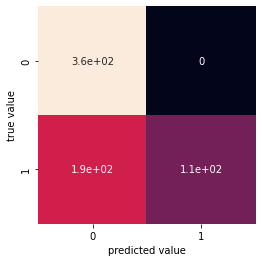

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

mat = confusion_matrix(Y_test, y_pred_label) #we dont do this because we dont get the whole number on the confusion matrixis to fet the whole number annotation
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print('Accuracy: %.3f' % accuracy_score(y_true=Y_test, y_pred=y_pred_label))
print('Precision: %.3f' % precision_score(y_true=Y_test, y_pred=y_pred_label))
print('Recall: %.3f' % recall_score(y_true=Y_test, y_pred=y_pred_label))
print('F1: %.3f' % f1_score(y_true=Y_test, y_pred=y_pred_label))

Accuracy: 0.715
Precision: 1.000
Recall: 0.365
F1: 0.535


In [70]:
from sklearn import metrics

# Model f1_score: how often is the classifier correct?
baseline_f1_score=metrics.f1_score(Y_test, y_pred_label)



print("F1_score:",baseline_f1_score)

F1_score: 0.5346534653465346


In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_label)


auc_keras_baseline = auc(fpr_keras, tpr_keras)
auc_keras_baseline

0.6824324324324325

Text(0.5, 0, 'False Positive Rate')

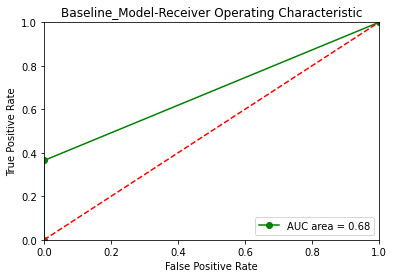

In [72]:
import matplotlib.pyplot as plt
plt.title('Baseline_Model-Receiver Operating Characteristic')
plt.plot(fpr_keras, tpr_keras, color='green',marker='o', label = 'AUC area = %0.2f' % auc_keras_baseline)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [73]:
# from tensorflow.keras.models import load_model

# reloaded_model=load_model("/content/drive/My Drive/my_model.h5") #loading the h5 file model


**Model-ResNet 50**

In [74]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import Model

input_shape=(224,224,3)



head_model = ResNet50(include_top=False,
                 weights='imagenet', #random initialization
                 #input_tensor=None,
                 input_shape=input_shape)
                 #pooling='avg',
                 #classes=2)


for layer in head_model.layers:
  layer.trainable = False #trainable are the last three layers until flatten (the whole set of fully connected layers)


x = layers.Flatten()(head_model.output) #google: how to cut off a pre train model resnet and add fully connected layers in tensorflow
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(2, activation = 'softmax')(x)

model = Model(inputs = head_model.input, outputs = predictions)




model.compile(optimizer=tf.keras.optimizers.Adam(0.00001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history=model.fit(
    X_train,Y_train,
    epochs=1000, #can change the epoch
    validation_split=0.15, verbose=1,callbacks=[es])

94781440/94765736 [==============================] - 2s 0us/step
Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


71/71 [==============================] - 15s 160ms/step - loss: 0.7018 - sparse_categorical_accuracy: 0.5765 - val_loss: 0.6826 - val_sparse_categorical_accuracy: 0.5556
Epoch 2/1000
71/71 [==============================] - 9s 129ms/step - loss: 0.6695 - sparse_categorical_accuracy: 0.5939 - val_loss: 0.6459 - val_sparse_categorical_accuracy: 0.5859
Epoch 3/1000
71/71 [==============================] - 9s 130ms/step - loss: 0.6073 - sparse_categorical_accuracy: 0.6756 - val_loss: 0.6071 - val_sparse_categorical_accuracy: 0.6313
Epoch 4/1000
71/71 [==============================] - 9s 126ms/step - loss: 0.6026 - sparse_categorical_accuracy: 0.6734 - val_loss: 0.6446 - val_sparse_categorical_accuracy: 0.6010
Epoch 5/1000
71/71 [==============================] - 9s 126ms/step - loss: 0.5975 - sparse_categorical_accuracy: 0.6894 - val_loss: 0.6659 - val_sparse_categorical_accuracy: 0.5934
Epoch 6/1000
71/71 [==============================] - 9s 130ms/step - loss: 0.5744 - sparse_categorica

In [75]:
model.save('/content/drive/MyDrive/resnet_model.h5')

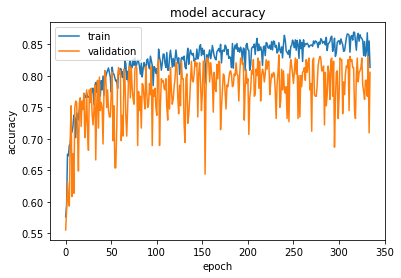

In [76]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

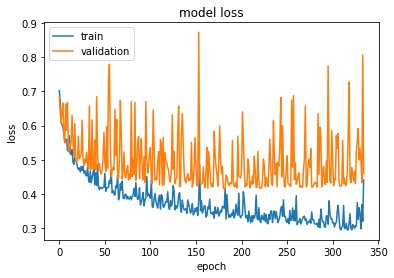

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [78]:
y_pred=model.predict(X_test) 
y_pred

array([[0.0000000e+00, 1.0000000e+00],
       [3.5620572e-11, 1.0000000e+00],
       [7.1390460e-24, 1.0000000e+00],
       ...,
       [1.8190033e-09, 1.0000000e+00],
       [3.4918220e-22, 1.0000000e+00],
       [2.8847701e-36, 1.0000000e+00]], dtype=float32)

In [79]:
lst=[]

for i in range(0,len(y_pred)):
     k=np.argmax(y_pred[i]) #it gives index value of the highest probability for each iteration 
     print(k)
     lst.append(k)

y_pred_label=np.array(lst)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [80]:
print(Y_train)

[1 0 1 ... 0 1 1]


In [81]:
np.unique(Y_train, return_counts=True)

(array([0, 1]), array([1436, 1201]))

In [82]:
np.unique(Y_test, return_counts=True)

(array([0, 1]), array([364, 296]))

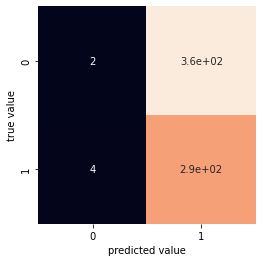

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

mat = confusion_matrix(Y_test, y_pred_label) #we dont do this because we dont get the whole number on the confusion matrixis to fet the whole number annotation
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print('Accuracy: %.3f' % accuracy_score(y_true=Y_test, y_pred=y_pred_label))
print('Precision: %.3f' % precision_score(y_true=Y_test, y_pred=y_pred_label))
print('Recall: %.3f' % recall_score(y_true=Y_test, y_pred=y_pred_label))
print('F1: %.3f' % f1_score(y_true=Y_test, y_pred=y_pred_label))

Accuracy: 0.445
Precision: 0.446
Recall: 0.986
F1: 0.615


In [85]:
from sklearn import metrics

# Model f1_score: how often is the classifier correct?
Resnet_f1_score=metrics.f1_score(Y_test, y_pred_label)



print("F1_score:",Resnet_f1_score)

F1_score: 0.6147368421052632


In [86]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_label)


auc_keras_ResNet50 = auc(fpr_keras, tpr_keras)
auc_keras_ResNet50 #auc score

0.495990495990496

Text(0.5, 0, 'False Positive Rate')

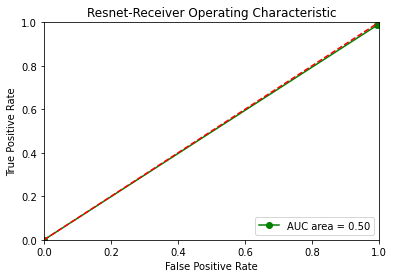

In [87]:
import matplotlib.pyplot as plt
plt.title('Resnet-Receiver Operating Characteristic')
plt.plot(fpr_keras, tpr_keras, color='green',marker='o', label = 'AUC area = %0.2f' % auc_keras_ResNet50)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**Model-InceptionV3**

In [88]:
from gc import callbacks
from tensorflow.keras.applications.inception_v3 import InceptionV3 

input_shape=(224,224,3)



head_model = InceptionV3(include_top=False,
                 weights='imagenet',
                 #input_tensor=None,
                 input_shape=input_shape)
                 #pooling='avg',
                 #classes=2,
                 #classifier_activation='softmax')

for layer in head_model.layers:
  layer.trainable = False #trainable are the last three layers until flatten (the whole set of fully connected layers)


x = layers.Flatten()(head_model.output) #google: how to cut off a pre train model resnet and add fully connected layers in tensorflow
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(2, activation = 'softmax')(x)

model = Model(inputs = head_model.input, outputs = predictions)


model.compile(optimizer=tf.keras.optimizers.Adam(0.00001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history=model.fit(
    X_train,Y_train,
    epochs=1000, #can change the epoch
    validation_split=0.15, verbose=1,callbacks=[es])

87924736/87910968 [==============================] - 3s 0us/step
Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


71/71 [==============================] - 15s 143ms/step - loss: 0.5565 - sparse_categorical_accuracy: 0.7367 - val_loss: 0.4630 - val_sparse_categorical_accuracy: 0.7879
Epoch 2/1000
71/71 [==============================] - 7s 97ms/step - loss: 0.2321 - sparse_categorical_accuracy: 0.9094 - val_loss: 0.4303 - val_sparse_categorical_accuracy: 0.8207
Epoch 3/1000
71/71 [==============================] - 7s 94ms/step - loss: 0.1352 - sparse_categorical_accuracy: 0.9661 - val_loss: 0.4318 - val_sparse_categorical_accuracy: 0.7904
Epoch 4/1000
71/71 [==============================] - 7s 94ms/step - loss: 0.0863 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.4362 - val_sparse_categorical_accuracy: 0.8056
Epoch 5/1000
71/71 [==============================] - 7s 94ms/step - loss: 0.0560 - sparse_categorical_accuracy: 0.9987 - val_loss: 0.4463 - val_sparse_categorical_accuracy: 0.8157
Epoch 6/1000
71/71 [==============================] - 7s 94ms/step - loss: 0.0417 - sparse_categorical_acc

In [89]:
model.save('/content/drive/MyDrive/inceptionV3_model.h5')

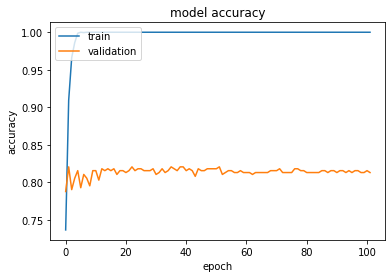

In [90]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

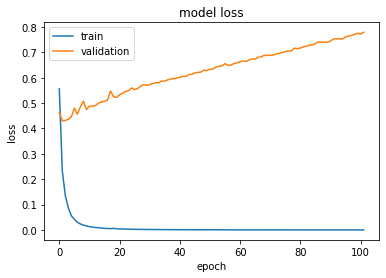

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [92]:
y_pred=model.predict(X_test) 
y_pred

array([[0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.2049965e-32, 1.0000000e+00]], dtype=float32)

In [93]:
lst=[]

for i in range(0,len(y_pred)):
     k=np.argmax(y_pred[i]) #it gives index value of the highest probability for each iteration 
     print(k)
     lst.append(k)

y_pred_label=np.array(lst)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


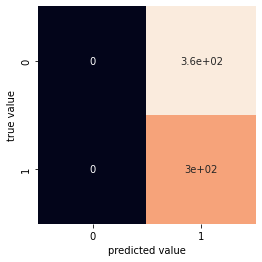

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

mat = confusion_matrix(Y_test, y_pred_label) #we dont do this because we dont get the whole number on the confusion matrixis to fet the whole number annotation
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print('Accuracy: %.3f' % accuracy_score(y_true=Y_test, y_pred=y_pred_label))
print('Precision: %.3f' % precision_score(y_true=Y_test, y_pred=y_pred_label))
print('Recall: %.3f' % recall_score(y_true=Y_test, y_pred=y_pred_label))
print('F1: %.3f' % f1_score(y_true=Y_test, y_pred=y_pred_label))

Accuracy: 0.448
Precision: 0.448
Recall: 1.000
F1: 0.619


In [96]:
from sklearn import metrics

# Model f1_score: how often is the classifier correct?
InceptionV3_f1_score=metrics.f1_score(Y_test, y_pred_label)



print("F1_score:",InceptionV3_f1_score)

F1_score: 0.6192468619246861


In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_label)


auc_keras_InceptionV3 = auc(fpr_keras, tpr_keras)
auc_keras_InceptionV3 #auc score

0.5

Text(0.5, 0, 'False Positive Rate')

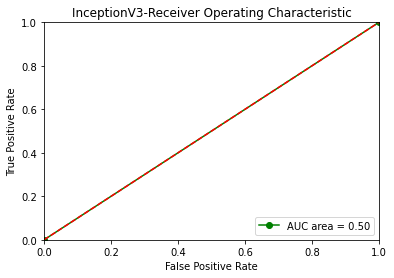

In [98]:
import matplotlib.pyplot as plt
plt.title('InceptionV3-Receiver Operating Characteristic')
plt.plot(fpr_keras, tpr_keras, color='green',marker='o', label = 'AUC area = %0.2f' % auc_keras_InceptionV3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**Model-VGG16**

In [99]:
from tensorflow.keras.applications.vgg16 import VGG16 

input_shape=(224,224,3)



head_model = VGG16(include_top=False,
                 weights='imagenet',
                 #input_tensor=None,
                 input_shape=input_shape)
                 #pooling='avg',
                 #classes=2,
                 #classifier_activation='softmax')


for layer in head_model.layers:
  layer.trainable = False #trainable are the last three layers until flatten (the whole set of fully connected layers)


x = layers.Flatten()(head_model.output) #google: how to cut off a pre train model resnet and add fully connected layers in tensorflow
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(2, activation = 'softmax')(x)

model = Model(inputs = head_model.input, outputs = predictions)




model.compile(optimizer=tf.keras.optimizers.Adam(0.00001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history=model.fit(
    X_train,Y_train,
    epochs=1000, #can change the epoch
    validation_split=0.15, verbose=1,callbacks=[es])

58900480/58889256 [==============================] - 1s 0us/step
Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


71/71 [==============================] - 19s 225ms/step - loss: 0.5182 - sparse_categorical_accuracy: 0.7390 - val_loss: 0.4915 - val_sparse_categorical_accuracy: 0.7828
Epoch 2/1000
71/71 [==============================] - 13s 190ms/step - loss: 0.3936 - sparse_categorical_accuracy: 0.8197 - val_loss: 0.4357 - val_sparse_categorical_accuracy: 0.8131
Epoch 3/1000
71/71 [==============================] - 13s 189ms/step - loss: 0.3527 - sparse_categorical_accuracy: 0.8469 - val_loss: 0.4211 - val_sparse_categorical_accuracy: 0.8081
Epoch 4/1000
71/71 [==============================] - 13s 190ms/step - loss: 0.3402 - sparse_categorical_accuracy: 0.8532 - val_loss: 0.3744 - val_sparse_categorical_accuracy: 0.8207
Epoch 5/1000
71/71 [==============================] - 14s 191ms/step - loss: 0.3139 - sparse_categorical_accuracy: 0.8657 - val_loss: 0.3668 - val_sparse_categorical_accuracy: 0.8409
Epoch 6/1000
71/71 [==============================] - 13s 189ms/step - loss: 0.2922 - sparse_categ

In [100]:
model.save('/content/drive/MyDrive/VGG16_model.h5')

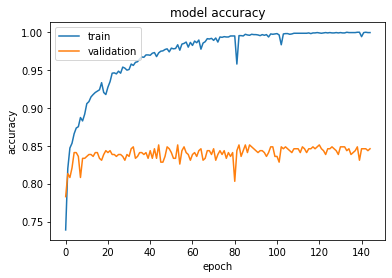

In [101]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

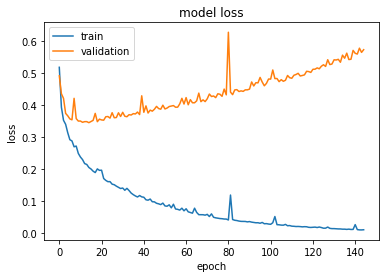

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [103]:
y_pred=model.predict(X_test) 
y_pred

array([[0.0000000e+00, 1.0000000e+00],
       [7.1547079e-28, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       ...,
       [1.0000000e+00, 1.1731382e-13],
       [1.0958346e-06, 9.9999893e-01],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [104]:
lst=[]

for i in range(0,len(y_pred)):
     k=np.argmax(y_pred[i]) #it gives index value of the highest probability for each iteration 
     print(k)
     lst.append(k)

y_pred_label=np.array(lst)

1
1
1
0
0
0
0
1
0
0
0
0
1
1
1
0
1
0
0
0
1
0
1
1
0
1
0
1
1
1
1
1
0
0
0
0
0
0
0
0
1
1
0
1
0
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
0
1
0
1
0
1
1
1
0
0
0
1
0
1
1
0
1
0
0
0
0
0
1
0
0
1
1
0
1
0
0
0
1
0
1
0
0
0
1
1
1
0
1
0
1
0
1
1
1
1
0
1
0
1
1
1
0
0
1
0
0
1
1
1
0
1
0
0
1
1
0
1
0
0
1
0
0
0
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
0
0
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
0
1
1
1
0
1
1
0
1
1
0
0
1
0
0
0
1
0
0
0
0
1
0
0
1
1
1
1
0
1
1
0
0
1
1
0
0
1
1
0
0
0
1
0
0
1
1
1
0
1
0
0
0
1
1
1
1
0
0
0
0
1
1
1
0
0
1
1
0
0
1
0
1
0
1
1
1
1
0
0
1
0
1
1
0
1
0
0
0
1
0
0
1
1
1
0
0
0
1
0
0
1
0
0
1
1
1
0
1
0
1
0
0
0
0
0
1
0
1
1
1
1
0
1
0
1
1
0
0
1
1
1
0
0
0
0
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
0
1
0
1
0
1
1
1
0
1
1
0
1
0
1
0
1
0
0
1
0
0
1
0
0
1
0
1
0
1
1
0
1
1
1
1
0
1
1
1
1
0
1
0
0
1
0
0
1
1
0
1
1
0
1
1
1
1
1
0
0
1
1
0
1
0
0
0
0
1
1
0
1
0
1
0
1
0
0
0
0
1
0
0
1
1
0
0
0
0
0
0
1
1
1
0
1
1
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
0
1
1
0
1
1
0
0
1
1
1
0
1
0
1
1
0
0
1
0
1
1
1
0
1
0
0
1
0
0
1
0
1
0
0
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
0
1
1
0
0
0
1
0
1
0
0


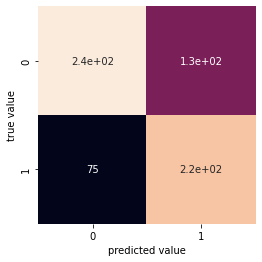

In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

mat = confusion_matrix(Y_test, y_pred_label) #we dont do this because we dont get the whole number on the confusion matrixis to fet the whole number annotation
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print('Accuracy: %.3f' % accuracy_score(y_true=Y_test, y_pred=y_pred_label))
print('Precision: %.3f' % precision_score(y_true=Y_test, y_pred=y_pred_label))
print('Recall: %.3f' % recall_score(y_true=Y_test, y_pred=y_pred_label))
print('F1: %.3f' % f1_score(y_true=Y_test, y_pred=y_pred_label))

Accuracy: 0.695
Precision: 0.637
Recall: 0.747
F1: 0.687


In [107]:
from sklearn import metrics

# Model f1_score: how often is the classifier correct?
VGG16_f1_score=metrics.f1_score(Y_test, y_pred_label)



print("F1_score:",VGG16_f1_score)

F1_score: 0.687402799377916


In [108]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_label)


auc_keras_VGG16 = auc(fpr_keras, tpr_keras)
auc_keras_VGG16 #auc score

0.7002338877338876

Text(0.5, 0, 'False Positive Rate')

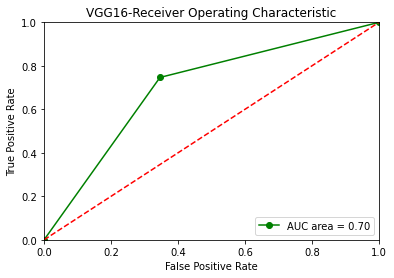

In [109]:
import matplotlib.pyplot as plt
plt.title('VGG16-Receiver Operating Characteristic')
plt.plot(fpr_keras, tpr_keras, color='green',marker='o', label = 'AUC area = %0.2f' % auc_keras_VGG16)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**Model-DenseNet121**

In [110]:
from tensorflow.keras.applications.densenet import DenseNet121

input_shape=(224,224,3)



head_model = DenseNet121(include_top=False,
                 weights='imagenet',
                 #input_tensor=None,
                 input_shape=input_shape)
                 #pooling='avg',
                 #classes=2)

for layer in head_model.layers:
  layer.trainable = False #trainable are the last three layers until flatten (the whole set of fully connected layers)


x = layers.Flatten()(head_model.output) #google: how to cut off a pre train model resnet and add fully connected layers in tensorflow
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(2, activation = 'softmax')(x)

model = Model(inputs = head_model.input, outputs = predictions)






model.compile(optimizer=tf.keras.optimizers.Adam(0.00001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history=model.fit(
    X_train,Y_train,
    epochs=1000, #can change the epoch
    validation_split=0.15, verbose=1,callbacks=[es])

29097984/29084464 [==============================] - 0s 0us/step
Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


71/71 [==============================] - 21s 181ms/step - loss: 0.4340 - sparse_categorical_accuracy: 0.8041 - val_loss: 0.4573 - val_sparse_categorical_accuracy: 0.7803
Epoch 2/1000
71/71 [==============================] - 9s 124ms/step - loss: 0.2021 - sparse_categorical_accuracy: 0.9206 - val_loss: 0.3344 - val_sparse_categorical_accuracy: 0.8636
Epoch 3/1000
71/71 [==============================] - 9s 122ms/step - loss: 0.1255 - sparse_categorical_accuracy: 0.9612 - val_loss: 0.3138 - val_sparse_categorical_accuracy: 0.8737
Epoch 4/1000
71/71 [==============================] - 8s 119ms/step - loss: 0.0942 - sparse_categorical_accuracy: 0.9768 - val_loss: 0.3072 - val_sparse_categorical_accuracy: 0.8737
Epoch 5/1000
71/71 [==============================] - 8s 119ms/step - loss: 0.0633 - sparse_categorical_accuracy: 0.9888 - val_loss: 0.3252 - val_sparse_categorical_accuracy: 0.8662
Epoch 6/1000
71/71 [==============================] - 9s 123ms/step - loss: 0.0527 - sparse_categorica

In [111]:
model.save('/content/drive/MyDrive/DenseNet121_model.h5')

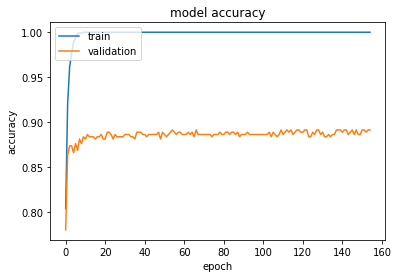

In [112]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

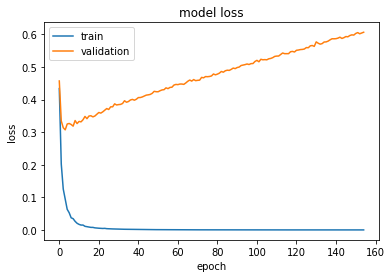

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [114]:
y_pred=model.predict(X_test) 
y_pred

array([[2.8675307e-08, 1.0000000e+00],
       [9.5230292e-20, 1.0000000e+00],
       [2.2437453e-17, 1.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00],
       [1.8575976e-18, 1.0000000e+00],
       [1.1458871e-11, 1.0000000e+00]], dtype=float32)

In [115]:
lst=[]

for i in range(0,len(y_pred)):
     k=np.argmax(y_pred[i]) #it gives index value of the highest probability for each iteration 
     print(k)
     lst.append(k)

y_pred_label=np.array(lst)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1


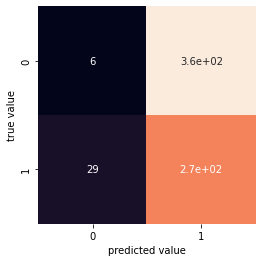

In [116]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

mat = confusion_matrix(Y_test, y_pred_label) #we dont do this because we dont get the whole number on the confusion matrixis to fet the whole number annotation
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print('Accuracy: %.3f' % accuracy_score(y_true=Y_test, y_pred=y_pred_label))
print('Precision: %.3f' % precision_score(y_true=Y_test, y_pred=y_pred_label))
print('Recall: %.3f' % recall_score(y_true=Y_test, y_pred=y_pred_label))
print('F1: %.3f' % f1_score(y_true=Y_test, y_pred=y_pred_label))

Accuracy: 0.414
Precision: 0.427
Recall: 0.902
F1: 0.580


In [118]:
from sklearn import metrics

# Model f1_score: how often is the classifier correct?
DenseNet121_f1_score=metrics.f1_score(Y_test, y_pred_label)



print("F1_score:",DenseNet121_f1_score)

F1_score: 0.5798045602605864


In [119]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_label)


auc_keras_DenseNet121 = auc(fpr_keras, tpr_keras)
auc_keras_DenseNet121 #auc score

0.45925527175527175

Text(0.5, 0, 'False Positive Rate')

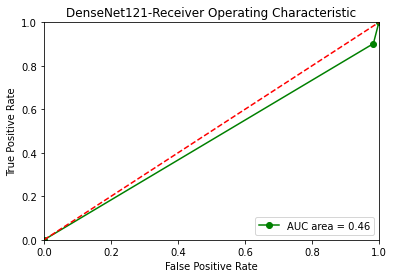

In [120]:
import matplotlib.pyplot as plt
plt.title('DenseNet121-Receiver Operating Characteristic')
plt.plot(fpr_keras, tpr_keras, color='green',marker='o', label = 'AUC area = %0.2f' % auc_keras_DenseNet121)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**Model-EfficientNetB2**

In [121]:
from tensorflow.keras.applications.efficientnet import EfficientNetB2

input_shape=(224,224,3)



head_model = EfficientNetB2(include_top=False,
                 weights='imagenet',
                 #input_tensor=None,
                 input_shape=input_shape)
                 #pooling='avg',
                 #classes=2,
                 #classifier_activation='softmax')



for layer in head_model.layers:
  layer.trainable = False #trainable are the last three layers until flatten (the whole set of fully connected layers)


x = layers.Flatten()(head_model.output) #google: how to cut off a pre train model resnet and add fully connected layers in tensorflow
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(2, activation = 'softmax')(x)

model = Model(inputs = head_model.input, outputs = predictions)






model.compile(optimizer=tf.keras.optimizers.Adam(0.00001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history=model.fit(
    X_train,Y_train,
    epochs=1000, #can change the epoch
    validation_split=0.15, verbose=1,callbacks=[es])

31801344/31790344 [==============================] - 2s 0us/step
Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


71/71 [==============================] - 21s 171ms/step - loss: 0.8490 - sparse_categorical_accuracy: 0.5078 - val_loss: 0.9522 - val_sparse_categorical_accuracy: 0.4545
Epoch 2/1000
71/71 [==============================] - 8s 115ms/step - loss: 0.8297 - sparse_categorical_accuracy: 0.5047 - val_loss: 1.4095 - val_sparse_categorical_accuracy: 0.4545
Epoch 3/1000
71/71 [==============================] - 8s 119ms/step - loss: 0.7882 - sparse_categorical_accuracy: 0.5185 - val_loss: 0.8501 - val_sparse_categorical_accuracy: 0.5455
Epoch 4/1000
71/71 [==============================] - 8s 115ms/step - loss: 0.7290 - sparse_categorical_accuracy: 0.5065 - val_loss: 0.7502 - val_sparse_categorical_accuracy: 0.5455
Epoch 5/1000
71/71 [==============================] - 8s 116ms/step - loss: 0.7866 - sparse_categorical_accuracy: 0.5176 - val_loss: 1.2078 - val_sparse_categorical_accuracy: 0.4545
Epoch 6/1000
71/71 [==============================] - 8s 119ms/step - loss: 0.9234 - sparse_categorica

In [122]:
model.save('/content/drive/MyDrive/EfficientNetB2_model.h5')

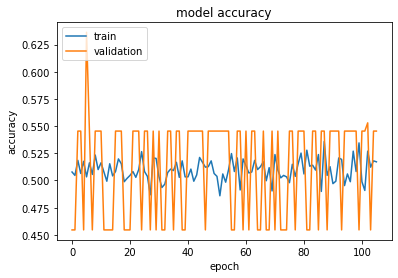

In [123]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

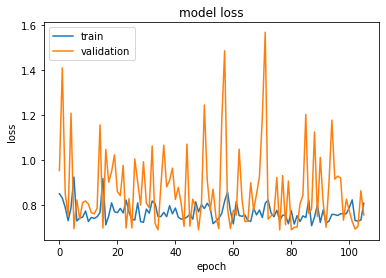

In [124]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [125]:
y_pred=model.predict(X_test) 
y_pred

array([[0.24647109, 0.75352895],
       [0.07895396, 0.921046  ],
       [0.06984871, 0.93015134],
       ...,
       [0.3486227 , 0.65137726],
       [0.4062755 , 0.5937245 ],
       [0.08687673, 0.9131233 ]], dtype=float32)

In [126]:
lst=[]

for i in range(0,len(y_pred)):
     k=np.argmax(y_pred[i]) #it gives index value of the highest probability for each iteration 
     print(k)
     lst.append(k)

y_pred_label=np.array(lst)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1


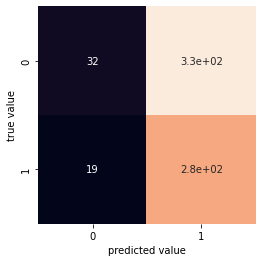

In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

mat = confusion_matrix(Y_test, y_pred_label) #we dont do this because we dont get the whole number on the confusion matrixis to fet the whole number annotation
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print('Accuracy: %.3f' % accuracy_score(y_true=Y_test, y_pred=y_pred_label))
print('Precision: %.3f' % precision_score(y_true=Y_test, y_pred=y_pred_label))
print('Recall: %.3f' % recall_score(y_true=Y_test, y_pred=y_pred_label))
print('F1: %.3f' % f1_score(y_true=Y_test, y_pred=y_pred_label))

Accuracy: 0.468
Precision: 0.455
Recall: 0.936
F1: 0.612


In [129]:
from sklearn import metrics

# Model f1_score: how often is the classifier correct?
EfficientNetB2_f1_score=metrics.f1_score(Y_test, y_pred_label)



print("F1_score:",EfficientNetB2_f1_score)

F1_score: 0.6121546961325968


In [130]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_label)


auc_keras_EfficientNetB2 = auc(fpr_keras, tpr_keras)
auc_keras_EfficientNetB2 #auc score

0.5118614493614494

Text(0.5, 0, 'False Positive Rate')

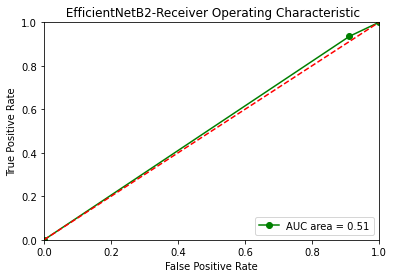

In [131]:
import matplotlib.pyplot as plt
plt.title(' EfficientNetB2-Receiver Operating Characteristic')
plt.plot(fpr_keras, tpr_keras, color='green',marker='o', label = 'AUC area = %0.2f' % auc_keras_EfficientNetB2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**Comparison**

In [136]:
F1_score_list=[baseline_f1_score,Resnet_f1_score,InceptionV3_f1_score,VGG16_f1_score,DenseNet121_f1_score,EfficientNetB2_f1_score]
F1_score_list.sort()
print(F1_score_list)
classifier_names_list=["Baseline_Model","DenseNet121","EfficientNetB2","ResNet50","InceptionV3","VGG16"]

[0.5346534653465346, 0.5798045602605864, 0.6121546961325968, 0.6147368421052632, 0.6192468619246861, 0.687402799377916]


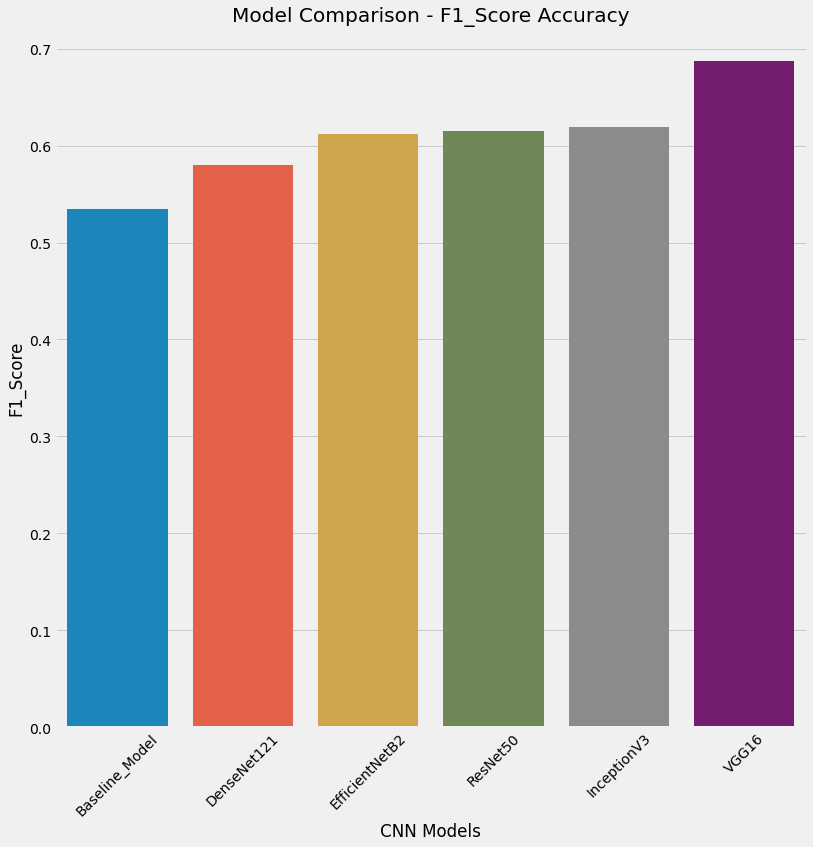

In [137]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 12))
sns.barplot(x=classifier_names_list, y=F1_score_list)
plt.xlabel("CNN Models")
plt.ylabel("F1_Score")
plt.xticks(rotation=45)
plt.title("Model Comparison - F1_Score Accuracy")
plt.show()